# RANDOM FOREST CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset.csv')
data.head()

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
del data['UDI']
del data['Product ID']
del data['Target']
del data['Type']

In [4]:
df = data.dropna()

In [5]:
df.columns

Index(['Air_temperature ', 'Process_temperature ', 'Rotational_speed ',
       'Torque ', 'Tool_wear ', 'Failure_Type'],
      dtype='object')

In [6]:
# df = df1.rename({'Air temperature [K]':'Air_temperature','Process temperature [K]':'Process_temperature_K','Rotational speed [rpm]':'Rotational_speed_rpm', 'Torque [Nm]':'Torque_Nm', 'Tool wear [min]':'Tool_wear_min', 'Failure Type':'Failure_Type'},axis=1)

In [7]:
df['Failure_Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [8]:
# from sklearn.preprocessing import LabelEncoder
# lab=LabelEncoder()
# df['Failure_Type']=lab.fit_transform(df['Failure_Type'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Failure_Type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df['Failure_Type'].unique()

array([1, 3, 5, 2, 4, 0])

In [10]:
df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,298.1,308.6,1551,42.8,0,1
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,1
3,298.2,308.6,1433,39.5,7,1
4,298.2,308.7,1408,40.0,9,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air_temperature       10000 non-null  float64
 1   Process_temperature   10000 non-null  float64
 2   Rotational_speed      10000 non-null  int64  
 3   Torque                10000 non-null  float64
 4   Tool_wear             10000 non-null  int64  
 5   Failure_Type          10000 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 429.8 KB


In [12]:
x1 = df.drop(labels='Failure_Type', axis=1)
y1 = df.loc[:,'Failure_Type']

In [13]:
x1

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [14]:
df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,298.1,308.6,1551,42.8,0,1
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,1
3,298.2,308.6,1433,39.5,7,1
4,298.2,308.7,1408,40.0,9,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air_temperature       10000 non-null  float64
 1   Process_temperature   10000 non-null  float64
 2   Rotational_speed      10000 non-null  int64  
 3   Torque                10000 non-null  float64
 4   Tool_wear             10000 non-null  int64  
 5   Failure_Type          10000 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 429.8 KB


In [16]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})
OVER SAMPLING DATA COUNT  :  Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [18]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [19]:
# df['Type'].unique()

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
lr = RandomForestClassifier()
lr.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
predicted = lr.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00      1930
           2       1.00      1.00      1.00      1931
           3       1.00      1.00      1.00      1931
           4       1.00      1.00      1.00      1931
           5       1.00      1.00      1.00      1930

    accuracy                           1.00     11583
   macro avg       1.00      1.00      1.00     11583
weighted avg       1.00      1.00      1.00     11583



In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[1930    0    0    0    0    0]
 [   0 1923    4    3    0    0]
 [   0    0 1931    0    0    0]
 [   0    0    0 1931    0    0]
 [   0    0    0    0 1931    0]
 [   0    0    0    0    0 1930]]


In [25]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(lr, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [99.74099974 99.77553311 98.13503713 99.70644103 99.89639095]


In [26]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 99.93956660623327


In [27]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 0.06043339376672709


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[1930    0    0    0    0    0]
 [   0 1923    4    3    0    0]
 [   0    0 1931    0    0    0]
 [   0    0    0 1931    0    0]
 [   0    0    0    0 1931    0]
 [   0    0    0    0    0 1930]]


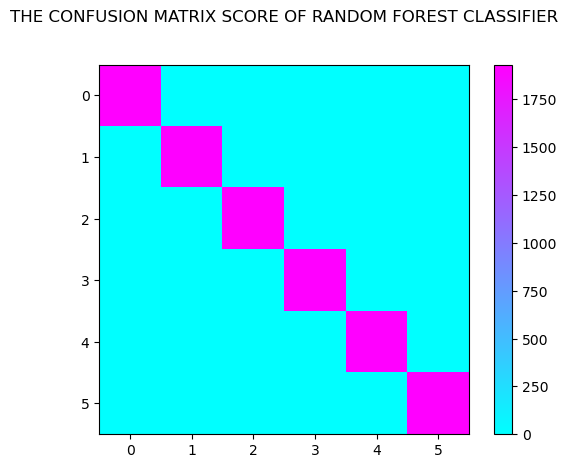

In [28]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

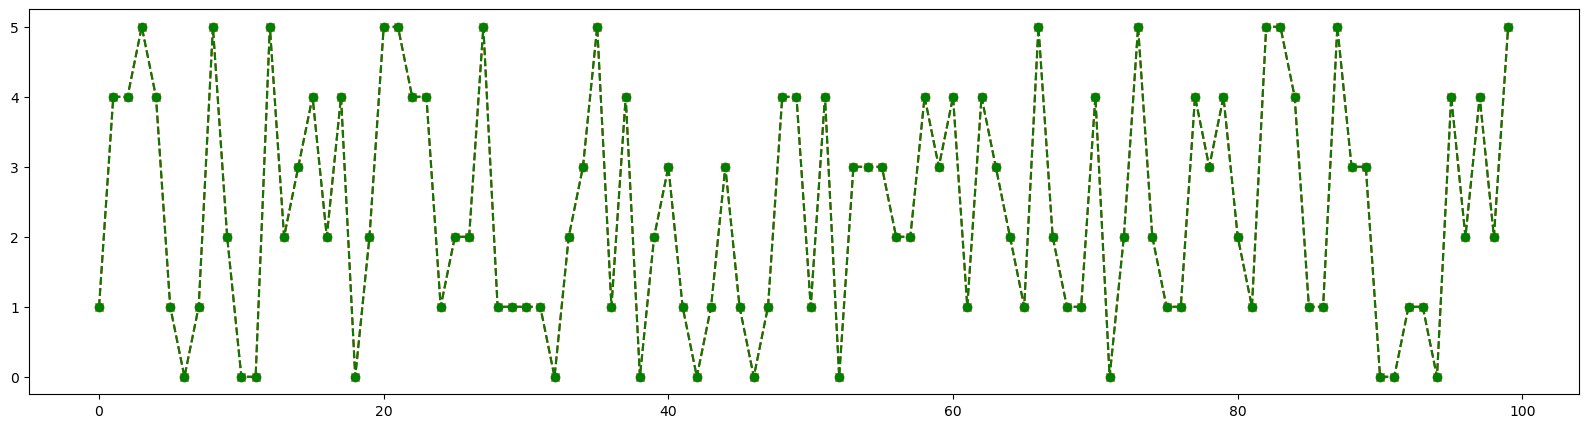

In [29]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [30]:
import joblib
joblib.dump(lr,'Model.pkl')

['Model.pkl']